
**Step #1 :- Import modules, Packages and Dependancies.**

In [ ]:
# Import All

import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 14, 6

%matplotlib inline

**Step #2 :- Load Data**

In [ ]:
# Read CSV file with Geographical Data.
data = pd.read_excel("Country.xlsx")
data.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


**Show some info about dataframe**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    243 non-null    object 
 1   latitude   244 non-null    float64
 2   longitude  244 non-null    float64
 3   name       244 non-null    object 
dtypes: float64(2), object(2)
memory usage: 7.8+ KB


**Plot the Geographical Points.**

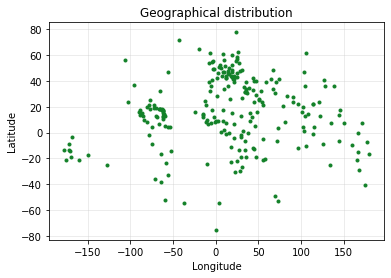

In [ ]:
_ = plt.plot(data['longitude'], data['latitude'], marker=".", linewidth = 0, color='#128128')
_=plt.grid(which='major', color='#cccccc', alpha=0.45)
_=plt.title('Geographical distribution', family='Arial',fontsize=12)
_=plt.xlabel('Longitude')
_=plt.ylabel('Latitude')

**Step #3 :- Prepare DBSCAN Model**

**Train the model and identify outliers**

In [ ]:
#Prepare data for model
dbscan_data = data[['longitude','latitude']]
dbscan_data = dbscan_data.values.astype('float32',copy=False)
dbscan_data

array([[ 1.60155404e+00,  4.25462456e+01],
       [ 5.38478165e+01,  2.34240761e+01],
       [ 6.77099533e+01,  3.39391098e+01],
       [-6.17964287e+01,  1.70608158e+01],
       [-6.30686150e+01,  1.82205544e+01],
       [ 2.01683311e+01,  4.11533318e+01],
       [ 4.50381889e+01,  4.00690994e+01],
       [-6.90600891e+01,  1.22260790e+01],
       [ 1.78738861e+01, -1.12026920e+01],
       [-7.13889971e-02, -7.52509766e+01],
       [-6.36166725e+01, -3.84160957e+01],
       [-1.70132217e+02, -1.42709723e+01],
       [ 1.45500717e+01,  4.75162315e+01],
       [ 1.33775131e+02, -2.52743988e+01],
       [-6.99683380e+01,  1.25211096e+01],
       [ 4.75769272e+01,  4.01431046e+01],
       [ 1.76790752e+01,  4.39158859e+01],
       [-5.95431976e+01,  1.31938868e+01],
       [ 9.03563309e+01,  2.36849937e+01],
       [ 4.46993589e+00,  5.05038872e+01],
       [-1.56159306e+00,  1.22383327e+01],
       [ 2.54858303e+01,  4.27338829e+01],
       [ 5.06377716e+01,  2.59304142e+01],
       [ 2.

**Normalize Data**

In [ ]:
#Normalize Data
dbscan_data_scaler = StandardScaler().fit(dbscan_data)
dbscan_data = dbscan_data_scaler.transform(dbscan_data)
dbscan_data

array([[-0.15839218,  0.974695  ],
       [ 0.5493146 ,  0.26583004],
       [ 0.7370855 ,  0.6556257 ],
       [-1.0171556 ,  0.02994194],
       [-1.0343882 ,  0.07293382],
       [ 0.0931059 ,  0.9230592 ],
       [ 0.42998296,  0.8828664 ],
       [-1.1155463 , -0.1492833 ],
       [ 0.06202627, -1.0177953 ],
       [-0.18105319, -3.392086  ],
       [-1.041812  , -2.026605  ],
       [-2.4846287 , -1.1315376 ],
       [ 0.01700322,  1.158934  ],
       [ 1.6319778 , -1.539438  ],
       [-1.1278491 , -0.13834643],
       [ 0.46437165,  0.8856098 ],
       [ 0.05938744,  1.025468  ],
       [-0.9866343 , -0.11340637],
       [ 1.0438442 ,  0.27550232],
       [-0.11953823,  1.2696873 ],
       [-0.20123889, -0.14882906],
       [ 0.1651346 ,  0.98165077],
       [ 0.5058326 ,  0.3587408 ],
       [ 0.22518298, -0.72754824],
       [-0.14871682, -0.25746894],
       [-1.0572634 ,  0.59565616],
       [ 1.3739685 , -0.4343838 ],
       [-1.0414325 , -1.2063892 ],
       [-0.8834451 ,

**Construct Model**

In [ ]:
model = DBSCAN(eps = 0.25, min_samples = 12, metric = 'euclidean').\
    fit(dbscan_data)
model

DBSCAN(algorithm='auto', eps=0.25, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=12, n_jobs=None, p=None)

**Step #4 :- Visualize Result**

In [ ]:
#Separate ouliers from clustered data
outliers_df = data[model.labels_ == -1]
clusters_df = data[model.labels_ != -1]

colors = model.labels_
colors_clusters = colors[colors != -1]
color_outliers = 'black'

#Get info about the clusters
clusters = Counter(model.labels_)
print(clusters)
print(data[model.labels_ == -1].head())
print('Number of Clusters = ()'.format(len(clusters)-1))

Counter({-1: 132, 0: 65, 1: 33, 2: 14})
   country   latitude   longitude            name
2       AF  33.939110   67.709953     Afghanistan
8       AO -11.202692   17.873887          Angola
9       AQ -75.250973   -0.071389      Antarctica
10      AR -38.416097  -63.616672       Argentina
11      AS -14.270972 -170.132217  American Samoa
Number of Clusters = ()


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


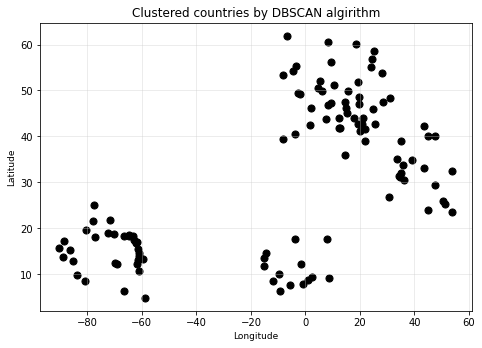

In [ ]:
#Plot clusters and Outliers
fig = plt.figure()

ax=fig.add_axes([.1, .1, 1, 1])

ax.scatter(clusters_df['longitude'], clusters_df['latitude'],  c = color_outliers, edgecolors = 'black', s=50 )
ax.set_xlabel('Longitude', family='Arial',fontsize=9)
ax.set_ylabel('Latitude', family='Arial',fontsize=9)

plt.title('Clustered countries by DBSCAN algirithm', family='Arial', fontsize =12)

plt.grid(which='major',color='#cccccc',alpha=0.45)

plt.show()